[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/casadoj/efas_hydro.git/HEAD?urlpath=%2Fdoc%2Ftree%2F.%2Fnotebook%2Ftutorial.ipynb)

# How to extract information from the database using `EFAS-hydro`?

In this tutorial we will extract information from the Hydrologial Data Management Service regarding reservoirs in Portugal. To be able to run it, you need to install `efashydro` in your environment, and you need to fill in the `USER` and `PASSWORD` below with your credentials.

In [9]:
from efashydro.stations import get_stations, plot_stations
from efashydro.timeseries import get_timeseries
from tqdm.auto import tqdm
from pathlib import Path

In [2]:
# HDMS API configuration
USER = 'xxxxxx'
PASSWORD = 'yyyyyy'

## `get_stations()`

To find out the available reservoirs in Portugal we will use the function `get_stations`. Apart from your API credentials, you can introduce several filters to narrow the extraction. In the example below we will only filter by type of station (`kind=reservoir`) and by country (`country_id=PT`)`.`

Metadata for 20 stations were extracted


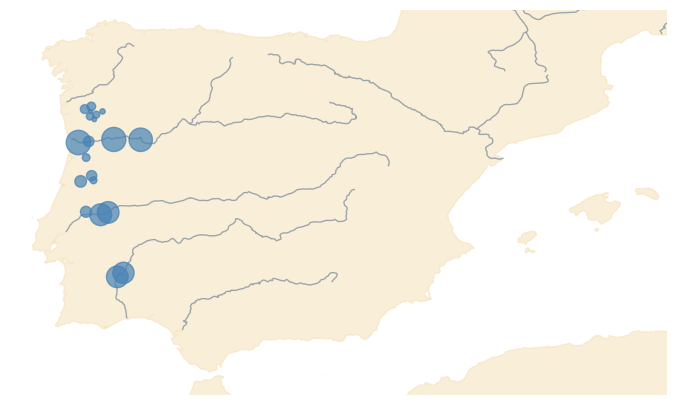

In [4]:
stations = get_stations(
    user=USER, 
    password=PASSWORD, 
    kind='reservoir',
    country_id='PT' # country code for Portugal
)
print(f'Metadata for {len(stations)} stations were extracted')

plot_stations(
    geometry=stations.geometry,
    area=stations.CATCH_SKM,
    extent=[-10, 4.5, 35.5, 44] # adjust to your study area
)

### Export

In [6]:
filename = 'reservoirs_PT'

# as shapefile
stations.to_file(f'{filename}.shp')
# as CSV
stations.drop('geometry', axis=1).to_csv(f'{filename}.csv')

The result is a `geopandas.GeoDataFrame` of stations and their metadata. As a `geopandas` object, the stations have associated their geographical location and can be exported to a shapefile to be used in a GIS software.

## `get_timeseries()`

Now that we know the Portuguese reservoirs in the database, we can iteratively extract the available time series using the function `get_timeseries`. 

This function can only extract the time series for a station and a data service at a time, but multiple variables. In the example below, we iterate over the stations and extract the daily historical time series (`service='nhoperationa24hw'`) and all the variables related to reservoirs (`variable=['I', 'O', 'R', 'V']`).

In [7]:
time_series = {}
for efas_id in tqdm(stations.index, desc='Load timeseries'):
    time_series[efas_id] = get_timeseries(
        user=USER,
        password=PASSWORD,
        station_id=efas_id,
        service='nhoperational24hw', # historical operational daily values
        variable=['I', 'O', 'R', 'V'], # inflow, outflow, reservoir level and storage 
    )

Stations:   0%|          | 0/20 [00:00<?, ?it/s]

Variables:   0%|          | 0/4 [00:00<?, ?it/s]

Variables:   0%|          | 0/4 [00:00<?, ?it/s]

Variables:   0%|          | 0/4 [00:00<?, ?it/s]

Variables:   0%|          | 0/4 [00:00<?, ?it/s]

Variables:   0%|          | 0/4 [00:00<?, ?it/s]

Variables:   0%|          | 0/4 [00:00<?, ?it/s]

Variables:   0%|          | 0/4 [00:00<?, ?it/s]

Variables:   0%|          | 0/4 [00:00<?, ?it/s]

Variables:   0%|          | 0/4 [00:00<?, ?it/s]

Variables:   0%|          | 0/4 [00:00<?, ?it/s]

Variables:   0%|          | 0/4 [00:00<?, ?it/s]

Variables:   0%|          | 0/4 [00:00<?, ?it/s]

Variables:   0%|          | 0/4 [00:00<?, ?it/s]

Variables:   0%|          | 0/4 [00:00<?, ?it/s]

Variables:   0%|          | 0/4 [00:00<?, ?it/s]

Variables:   0%|          | 0/4 [00:00<?, ?it/s]

Variables:   0%|          | 0/4 [00:00<?, ?it/s]

Variables:   0%|          | 0/4 [00:00<?, ?it/s]

Variables:   0%|          | 0/4 [00:00<?, ?it/s]

Variables:   0%|          | 0/4 [00:00<?, ?it/s]

The result is a dictionary of `pandas.DataFrames`, where every key is the ID of a station and the value the time series available for that station. These `pandas.DataFrames` could be saved as CSV files, for instance.

### Export

In [10]:
path_timeseries = Path('./timeseries/')
path_timeseries.mkdir(parents=True, exist_ok=True)

# save as CSV files
for efas_id, df in tqdm(time_series.items(), desc='Export timeseries'):
    df.to_csv(path_timeseries / f'{efas_id}.csv')

Export timeseries:   0%|          | 0/20 [00:00<?, ?it/s]